In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style('whitegrid')
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# '-' 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 숫자 출력 형태 설정
pd.options.display.float_format = '{:.2f}'.format

# DataFrame 출력 범위 설정
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',999)

In [62]:
df = pd.read_csv("company_nps_data.csv", encoding="cp949")
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [24]:
df.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [21]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


<Figure size 7200x360 with 0 Axes>

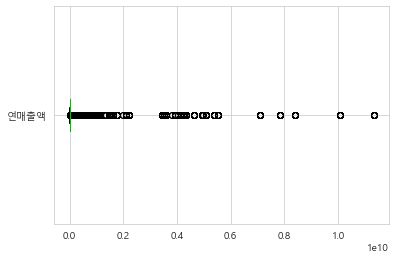

In [37]:
df[['연매출액']].plot.box(vert=False, grid=True)

In [39]:
corr = df.corr()
corr

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,1.00,-0.00,-0.03,0.01,-0.01,0.01
연매출액,-0.00,1.00,0.02,-0.00,0.73,0.64
년도,-0.03,0.02,1.00,-0.10,0.01,-0.00
월,0.01,-0.00,-0.10,1.00,0.01,0.00
월별_연금보험료,-0.01,0.73,0.01,0.01,1.00,0.96
월별_직원수,0.01,0.64,-0.00,0.00,0.96,1.00


In [40]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,1,-0.0017,-0.033,0.009,-0.01,0.0074
연매출액,-0.0017,1,0.015,-0.0013,0.73,0.64
년도,-0.033,0.015,1,-0.096,0.0081,-0.0022
월,0.009,-0.0013,-0.096,1,0.005,0.002
월별_연금보험료,-0.01,0.73,0.0081,0.005,1,0.96
월별_직원수,0.0074,0.64,-0.0022,0.002,0.96,1


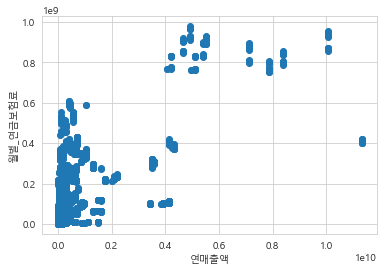

In [28]:
plt.scatter(df['연매출액'], df['월별_연금보험료'])
plt.xlabel('연매출액')
plt.ylabel('월별_연금보험료')
plt.savefig('./연매출액_월별_연금보험료_변화.png')
plt.show()

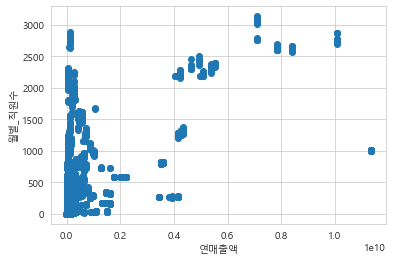

In [29]:
plt.scatter(df['연매출액'], df['월별_직원수'])
plt.xlabel('연매출액')
plt.ylabel('월별_직원수')
plt.savefig('./연매출액_월별_직원수_변화.png')
plt.show()

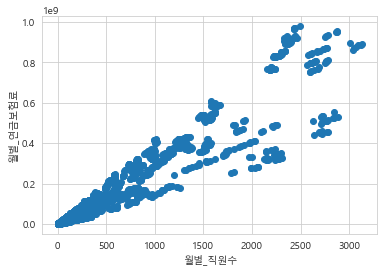

In [30]:
plt.scatter(df['월별_직원수'], df['월별_연금보험료'])
plt.xlabel('월별_직원수')
plt.ylabel('월별_연금보험료')
plt.savefig('./월별_직원수_월별_연금보험료_변화.png')
plt.show()

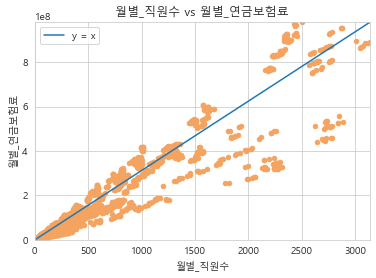

In [47]:
max_emp = df['월별_직원수'].max()

df_helper_line = pd.DataFrame({
    '월별_직원수' : [0,max_emp],
    'y = x' : [0,978067260.00]
})

ax = df.plot.scatter(x = '월별_직원수', y = '월별_연금보험료',
                       color = 'sandybrown', ylim = (0,978067260.00),
                       title = '월별_직원수 vs 월별_연금보험료')
df_helper_line.plot.line(x = '월별_직원수', y = 'y = x', ax = ax) #overlay plots


In [ ]:
국민연금보험료와 직원수 둘 중 하나만 써도 될듯

In [9]:
# 회사ID 개수 확인
len(df['회사ID'].unique())

5000

In [63]:
df['날짜'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,201702
99797,239388,1045021,2018,10,1428800,9,201810
99798,272304,181898,2018,3,392560,4,201803
99799,362194,2100218,2018,12,874780,3,201812


In [64]:
df_233757 = df.loc[(df["회사ID"]==233757),:].sort_values(by=['날짜'],axis=0)
df_233757

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜
99710,233757,9835158,2015,11,2043240,10,201511
89694,233757,9835158,2015,12,2691240,15,201512
90070,233757,30229862,2016,1,2710780,15,201601
9201,233757,30229862,2016,2,2311460,13,201602
55588,233757,30229862,2016,3,2311460,13,201603
31365,233757,30229862,2016,4,3691160,17,201604
8183,233757,30229862,2016,5,3753260,19,201605
11312,233757,30229862,2016,6,4663160,23,201606
93788,233757,30229862,2016,7,5065980,24,201607
95524,233757,30229862,2016,8,5317980,25,201608


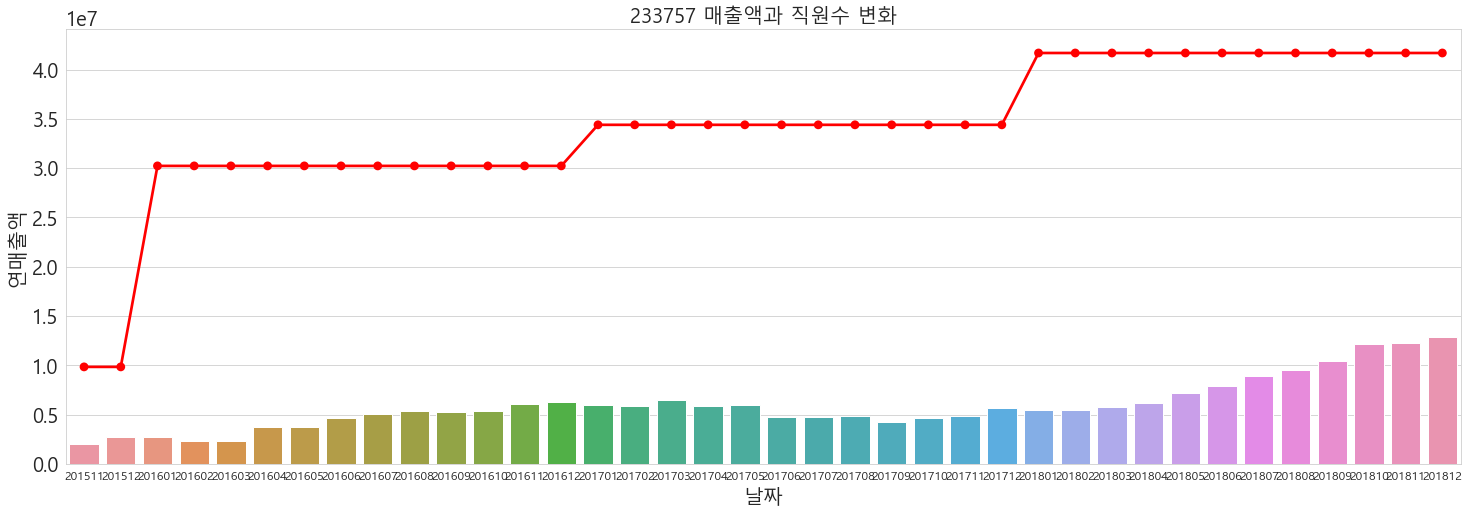

In [67]:
plt.figure(figsize=[25,8])
plt.title("233757 매출액과 직원수 변화")
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=20)

ax = sns.barplot(x="날짜", y="월별_연금보험료", data=df_233757)
sns.pointplot(data=df_233757, x='날짜', y='연매출액',color='r')

In [ ]:
# 회사 선정
연매출액 평균 이상 top5
월별_연금보험료 평균 이상 top5
월별_